In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("E-commerce Dataset.csv")

In [6]:
df=pd.DataFrame(data)

In [7]:
df.head(5)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


## 1. What are the top 10 most sold products?

In [29]:
sold_products = df.groupby("Product")["Quantity"].sum()

In [33]:
to_10_sold_products = sold_products.sort_values(ascending=False).head(10)

In [34]:
print(to_10_sold_products)

Product
Titak watch      6254.0
Formal Shoes     6154.0
Sports Wear      6093.0
Running Shoes    6064.0
Fossil Watch     6050.0
Sneakers         6049.0
Casula Shoes     6035.0
Shirts           6012.0
Suits            5996.0
T - Shirts       5986.0
Name: Quantity, dtype: float64


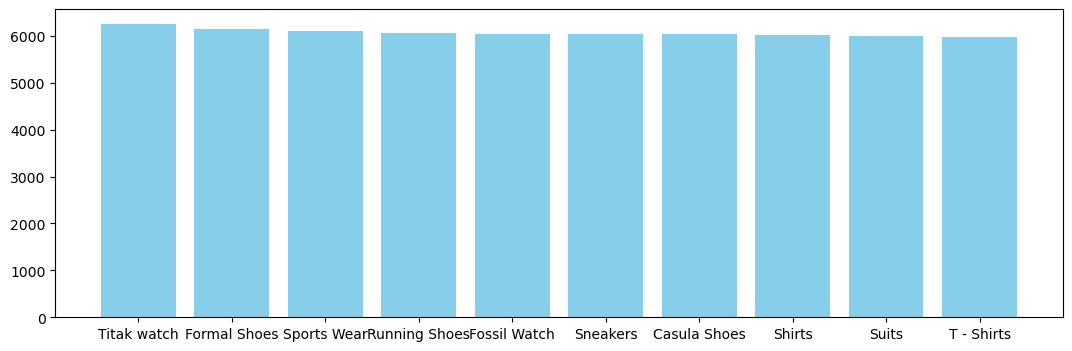

In [53]:
products = to_10_sold_products.index      # Product names
quantities = to_10_sold_products.values   # Quantity sold
plt.figure(figsize=(13, 4))
plt.bar(products, quantities, color='skyblue')
plt.show()

## 2. Which product categories appear most often?

In [64]:
Product_Category_count = df.groupby("Product_Category")["Product_Category"].count()

In [65]:
Common_Product_Category = Product_Category_count.sort_values(ascending = False).head(1)

In [66]:
print(Common_Product_Category)

Product_Category
Fashion    25646
Name: Product_Category, dtype: int64


In [67]:
product_category = Product_Category_count.index
Count = Product_Category_count.values

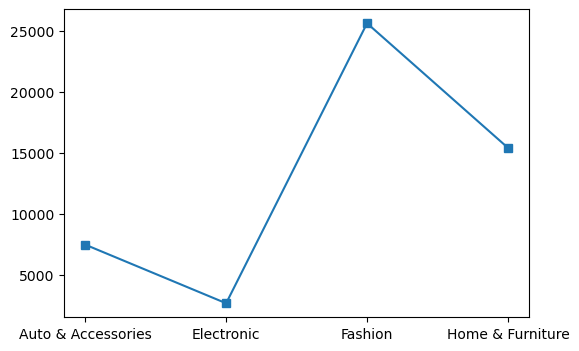

In [77]:
plt.figure(figsize=(6,4))
plt.plot(product_category,Count, marker="s")
plt.show()

## 3. What is the total revenue generated?

In [78]:
sale = df['Sales'].sum()

In [80]:
print(sale)   #total revenue without deducting shipping cost

7813411.0

In [81]:
total_revenue = (df['Sales']-df['Shipping_Cost']).sum()

In [82]:
print(total_revenue)   ##total revenue after deducting shipping cost

7452019.1


## 4. What is the average order value?

In [85]:
Order_value = df['Sales'].sum()

In [95]:
total_order = df['Sales'].count()

In [96]:
average_order_value = Order_value/total_order

In [97]:
print(average_order_value)  #average_order_value

152.34087231180175


In [27]:
# OR

In [25]:
Order_value = df['Sales'].mean()

In [28]:
print(Order_value)

152.34087231180175


## 5. How many unique customers are there?

In [124]:
unique_customer = df["Customer_Id"].nunique()

In [125]:
print("unique_customer:",unique_customer)

unique_customer: 38997


## 6. Which gender makes the most purchases?

In [129]:
most_purchases = df["Gender"].value_counts().sort_values(ascending = False).head(1)

In [130]:
print(most_purchases)

Gender
Male    28138
Name: count, dtype: int64


## 7. How does the average order value differ by customer login type (Guest vs Member)?

In [32]:
avg_order_value  = df.groupby("Customer_Login_type")["Sales"].mean().sort_values(ascending = False)

In [33]:
print(avg_order_value)   # customer login type tend to spend per order.

Customer_Login_type
New             173.407407
Guest           154.488209
Member          152.254501
First SignUp    148.826590
Name: Sales, dtype: float64


In [34]:
Customer_Login_type = avg_order_value.index

In [35]:
avg_order_value = avg_order_value.values

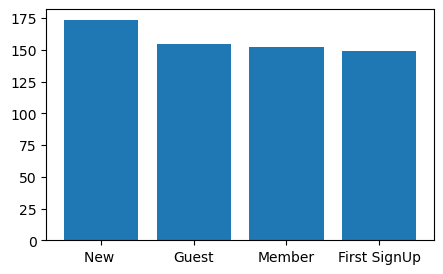

In [38]:
plt.figure(figsize = (5,3))
plt.bar(Customer_Login_type, avg_order_value)
plt.show()

 ## 8. What is the distribution of sales across different payment methods?

In [40]:
distribution = df.groupby("Payment_method")['Sales'].sum().sort_values(ascending = False)

In [41]:
print("Distribution of sales across different payment methods:", distribution)

Distribution of sales across different payment methods: Payment_method
credit_card    5819379.0
money_order    1461269.0
e_wallet        422750.0
debit_card      109979.0
not_defined         34.0
Name: Sales, dtype: float64


In [42]:
Payment_method = distribution.index

In [43]:
Sales = distribution.values

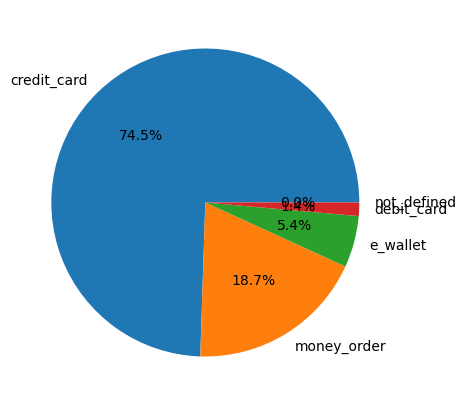

In [52]:
plt.figure(figsize = (5,5))
plt.pie(Sales, labels = Payment_method, autopct = "%1.1f%%")
plt.show()

## 9. How do discounts affect profit margins?

In [62]:
df["Profit_Margin"] = (df["Profit"] / df["Sales"])  # profit margin for each order

result = df.groupby("Discount")["Profit_Margin"].mean().sort_index() 
print(result)    # showing result for how profit margin goes as discount increases


Discount
0.1    0.451229
0.2    0.437836
0.3    0.414772
0.4    0.419527
0.5    0.408821
Name: Profit_Margin, dtype: float64


In [63]:
# As a result - when discount increases profit margin decreases.

## 10. What is the trend of sales over months in 2018?

In [68]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

In [69]:
df["Year"] = df["Order_Date"].dt.year

In [70]:
df["Month"] = df["Order_Date"].dt.month

In [75]:
Sales_2018 = df[df["Year"] == 2018].groupby('Month')["Sales"].sum()

In [76]:
Sales_2018

Month
1     379627.0
2     332495.0
3     435502.0
4     597312.0
5     824502.0
6     642555.0
7     810205.0
8     664495.0
9     738303.0
10    743387.0
11    877881.0
12    767147.0
Name: Sales, dtype: float64

In [78]:
sales = Sales_2018.values

In [79]:
Month = Sales_2018.index

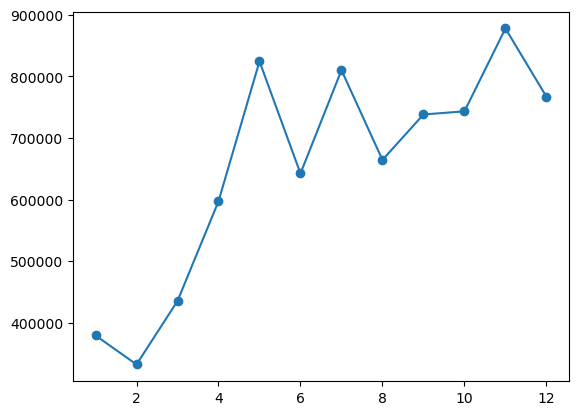

In [82]:
plt.plot(Month, sales, marker = "o")
plt.show()

## 11. Create visualization for the top products, and high-value customers?

In [87]:
Top_product = df.groupby("Product")["Sales"].sum().sort_values(ascending = False).head(5)

In [89]:
High_value_customer = df.groupby("Customer_Id")["Sales"].sum().sort_values(ascending = False).head(5)

In [99]:
Product = Top_product.index

In [100]:
Sales = Top_product.values

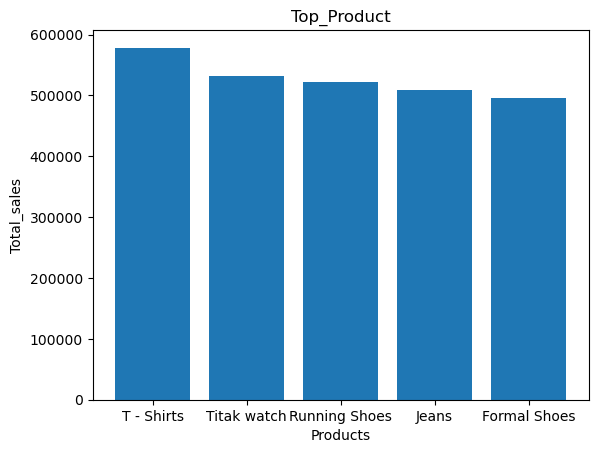

In [111]:
plt.bar(Product,Sales)
plt.title("Top_Product")
plt.xlabel("Products")
plt.ylabel("Total_sales")
plt.show()

In [121]:
customer = High_value_customer.index

In [122]:
sales = High_value_customer.values

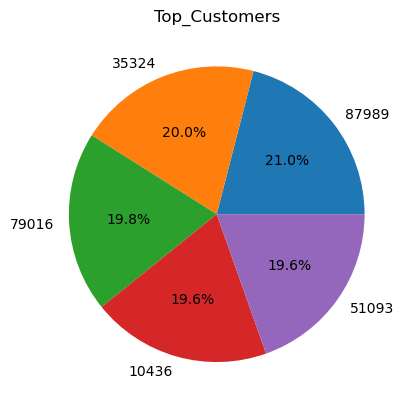

In [127]:
plt.pie(sales, labels = customer, autopct = "%1.1f%%")
plt.title("Top_Customers")
plt.show()